<a href="https://colab.research.google.com/github/agmarrugo/computer-vision-utb/blob/main/notebooks/lab_linear_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Activity: Linear filters

Andres Marrugo, PhD    
Universidad Tecnológica de Bolívar

In this notebook you will learn the fundamentals of linear filters and how they operate on images.

## Introduction to Linear Filters

Linear filters are fundamental building blocks in image processing and signal analysis. They play a crucial role in enhancing, smoothing, or detecting features within an image or signal. By selectively amplifying or attenuating specific frequency components, linear filters can significantly influence the characteristics of the processed data.

In the context of image processing, linear filters are used to achieve various effects such as blurring, sharpening, edge detection, noise reduction, and more. Understanding how linear filters operate is essential for anyone working with images, be it in computer vision, medical imaging, or other interdisciplinary fields.


## Brief Theory of Linear Filters

Linear filters operate on an image by convolving it with a kernel or filter mask, a small matrix used to modify the image. The kernel's values determine the filter's behavior, allowing for various types of transformations.

### Types of Linear Filters
- **Low-Pass Filters:** Preserve low-frequency components while attenuating high-frequency noise or details.
- **High-Pass Filters:** Emphasize edges and fine details by suppressing low-frequency components.
- **Band-Pass Filters:** Allow a specific range of frequencies to pass, filtering out components outside this range.

### Mathematical Foundations
The operation of a linear filter can be described mathematically through convolution, represented by the symbol '*'. If \( f(x, y) \) is the image and \( h(x, y) \) is the filter kernel, the filtered image \( g(x, y) \) is given by:

\[ g(x, y) = f(x, y) * h(x, y) \]

### Further Reading
To delve deeper into the theory and applications of linear filters, please refer to [Chapter 3 of "Computer Vision" by Richard Szeliski](https://szeliski.org/Book/).


In [11]:
# Import necessary libraries
from scipy import signal
from scipy import misc
from scipy import datasets
from scipy.ndimage import gaussian_filter
import numpy as np
import matplotlib.pyplot as plt
import skimage


# Sample image
image = np.uint8(datasets.ascent())

# Let's define a 3x3 box filter
box_fil = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) * 1/9
image_filtered = signal.convolve2d(image, box_fil, boundary='symm', mode='same')

# The result is the image smoothed with a Box filter

# Let's define a Gaussian filter

# Define the standard deviation for the Gaussian kernel
sigma = 1
# Apply the Gaussian filter to the image
image_gaussian_filtered = gaussian_filter(image, sigma=sigma)

# The result is the image smoothed with a Gaussian filter



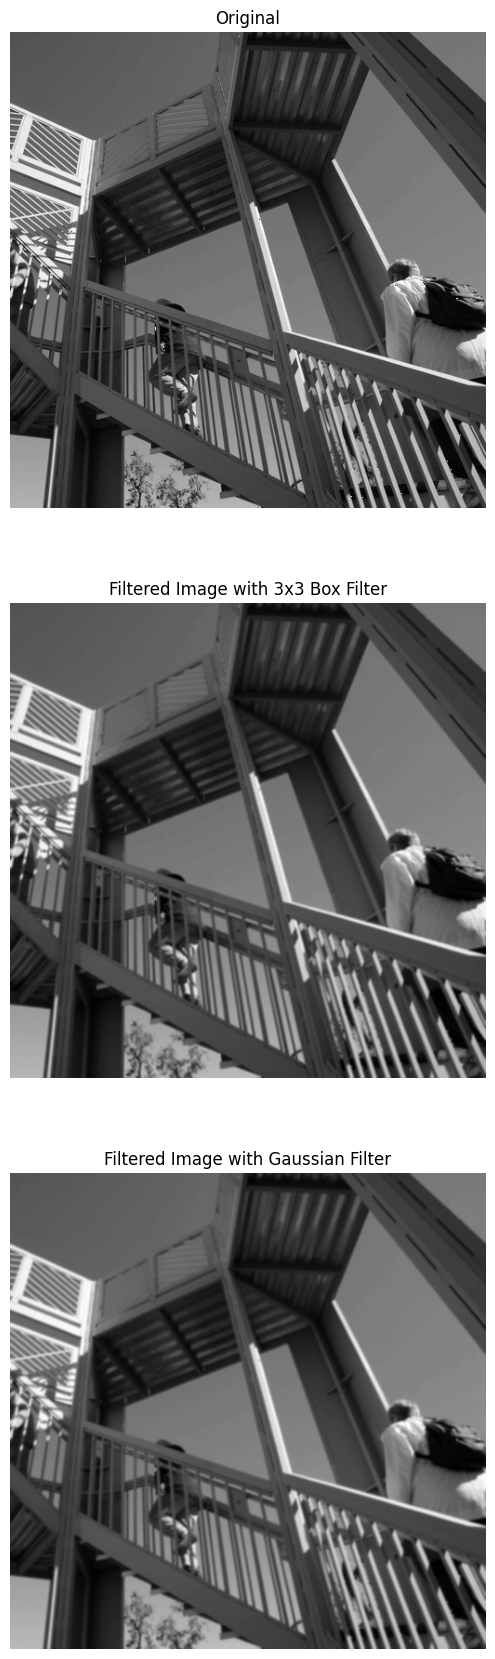

In [14]:
# Let's plot the original, box-filtered, and Gaussian-filtered images
fig, (ax_orig, ax_box, ax_gaussian) = plt.subplots(3, 1, figsize=(14, 21))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_box.imshow(image_filtered, cmap='gray')  # Box-filtered image
ax_box.set_title('Filtered Image with 3x3 Box Filter')
ax_box.set_axis_off()
ax_gaussian.imshow(image_gaussian_filtered, cmap='gray')  # Gaussian-filtered image
ax_gaussian.set_title('Filtered Image with Gaussian Filter')
ax_gaussian.set_axis_off()
fig.show()

In [ ]:
# TODO

# Try the different boundary options = {‘fill’, ‘wrap’, ‘symm’}
# Try the different modes {‘full’, ‘valid’, ‘same’}
# How does the result change?

## Let's Add Noise to the Image and Filter It

Adding noise to an image is a common practice to simulate real-world scenarios where images may contain various disturbances. We can then apply different filtering techniques to reduce or eliminate the noise. Here's how you can add Gaussian noise to an image and correctly convert it back to uint8 format.

### Step 1: Add Gaussian Noise
You can add Gaussian noise to the image using the following code:

```python
image_noisy = skimage.util.random_noise(image, mode='gaussian', seed=None, clip=True)
```

### Step 2: Convert to uint8 Format

After adding the noise, the pixel values will be in the floating-point range [0, 1]. To correctly convert the noisy image back to the uint8 range [0, 255], you should multiply the values by 255 and then convert to uint8:

```python
image_noisy = np.uint8(image_noisy * 255)
```

### Step 3: Display the Noisy Image

You can now use the `imshow()` function to visualize the noisy image. It should appear with the correct contrast, reflecting the added Gaussian noise.


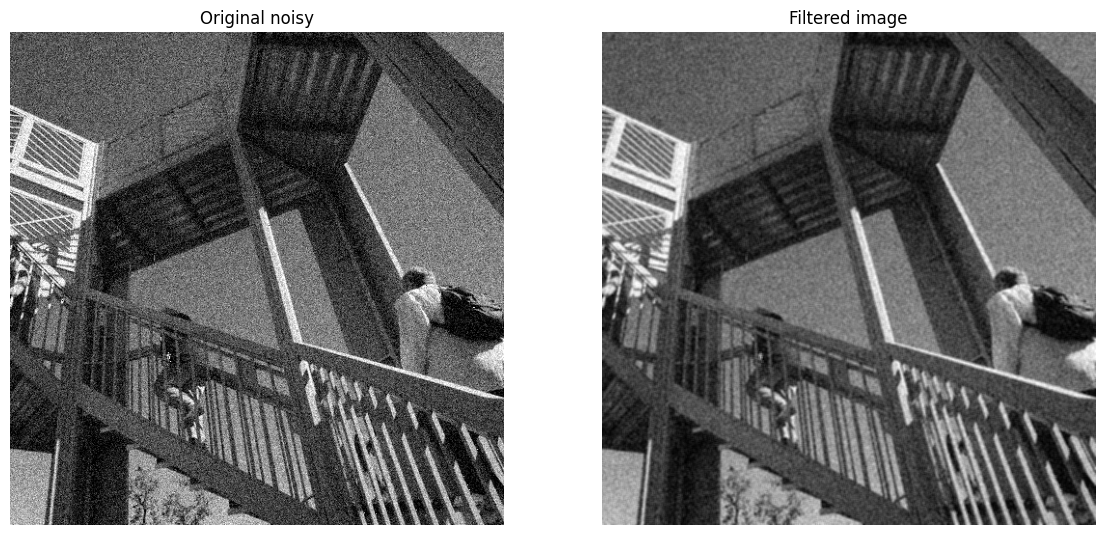

In [15]:
# Let's add noise to the image and filter it

image_noisy = skimage.util.random_noise(image, mode='gaussian', seed=None, clip=True)

# we convert back to uint8
image_noisy = np.uint8(image_noisy * 255)

# Let's filter the image
image_filtered = signal.convolve2d(image_noisy, box_fil, boundary='symm', mode='same')

fig, (ax_orig, ax_mag) = plt.subplots(1, 2, figsize=(14, 21))
ax_orig.imshow(image_noisy, cmap='gray')
ax_orig.set_title('Original noisy')
ax_orig.set_axis_off()
ax_mag.imshow(image_filtered, cmap='gray')
ax_mag.set_title('Filtered image')
ax_mag.set_axis_off()
fig.show()

## TODO: Experiment with Different Types of Noise

Now that you've learned how to add Gaussian noise to an image, let's experiment with other common types of noise. Understanding how different noise types affect an image can be crucial in various applications, from computer vision to medical imaging.

### 1. Pepper Noise
Pepper noise presents itself as dark pixels in bright regions of an image. You can add pepper noise using the following code:

```python
image_pepper = skimage.util.random_noise(image, mode='pepper', seed=None, clip=True)
image_pepper = np.uint8(image_pepper * 255)
```

### 2. Salt & Pepper Noise (s&p)
Salt and pepper noise is a combination of both dark and bright disturbances within an image. Add salt and pepper noise with:

```python
image_sp = skimage.util.random_noise(image, mode='s&p', seed=None, clip=True)
image_sp = np.uint8(image_sp * 255)
```

### 3. Speckle Noise
Speckle noise is a granular interference that can reduce the quality of an image. It can be added using:

```python
image_speckle = skimage.util.random_noise(image, mode='speckle', seed=None, clip=True)
image_speckle = np.uint8(image_speckle * 255)
```

### Analyzing the Results
After adding these noise types, visualize the images using the `imshow()` function and analyze how each noise type affects the image. Consider how different linear filters might be used to combat these noise types in real-world scenarios.

### Challenge
As a challenge, experiment with different parameters of the noise functions and see how they influence the appearance of the noise. Try to apply various linear filters to these noisy images and observe the results. Share your insights and findings with your classmates or in your lab report.

In [ ]:
# TODO

# Try with other types of noise ‘pepper’, ‘s&p’, ‘speckle’

## Applying a Median Filter to Remove Noise

Though not a linear filter, the median filter is a powerful tool for noise reduction in images. It's particularly effective at removing salt and pepper noise. Here's how you can apply a median filter to a noisy image:

### Step 1: Import the Required Function
First, import the `median` function from the `skimage.filters` module:

```python
from skimage.filters import median
```

### Step 2: Apply the Median Filter
Next, apply the median filter to the noisy image. If you are working with a colored image, make sure to convert it to grayscale or process each channel separately.

```python
from skimage.color import rgb2gray

image_gray = rgb2gray(image_noisy)
filtered_image = median(image_gray)
```

### Step 3: Visualize the Results
Finally, use the `imshow()` function to display both the original noisy image and the filtered image side by side. Observe the differences and analyze how the median filter has reduced the noise.

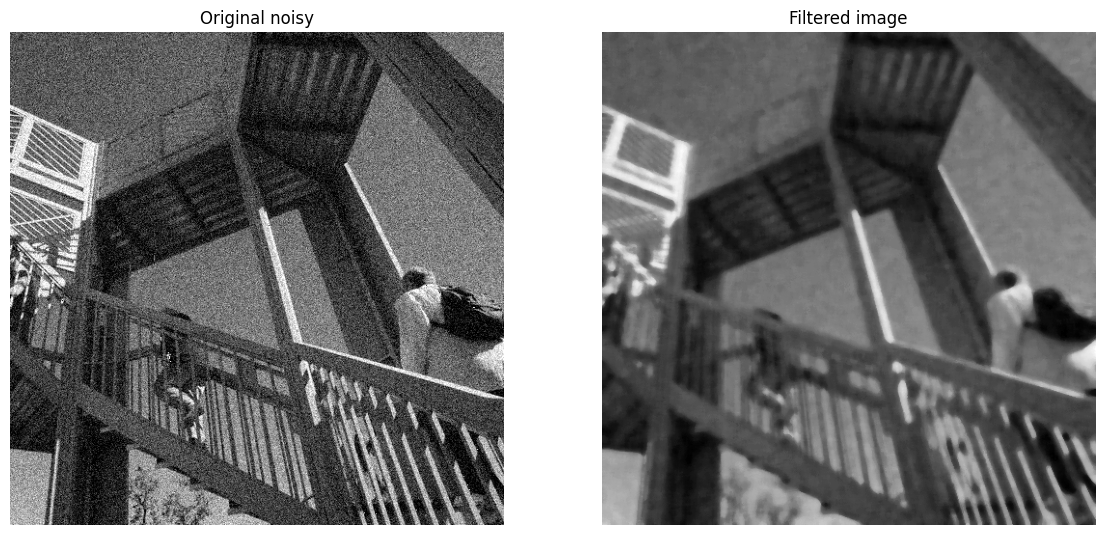

In [16]:
# Let's try other types of filters

from skimage.morphology import disk

med = skimage.filters.median(image_noisy, disk(5))

fig, (ax_orig, ax_mag) = plt.subplots(1, 2, figsize=(14, 21))
ax_orig.imshow(image_noisy, cmap='gray')
ax_orig.set_title('Original noisy')
ax_orig.set_axis_off()
ax_mag.imshow(med, cmap='gray')
ax_mag.set_title('Filtered image')
ax_mag.set_axis_off()
fig.show()

## TODO: Further Exploration

In addition to the filters we've already explored, there are many other linear and nonlinear filters used in image processing. These filters serve various purposes, from edge detection to image enhancement. Here are some filters you might want to explore:

### Edge Detection Filters
- **Prewitt Filter:** Often used for detecting vertical and horizontal edges.
- **Sobel Filter:** Similar to the Prewitt filter, but uses a different convolution kernel that may give better results for some images.

### Image Enhancement Filters
- **Unsharp Filter:** Enhances the edges of an image by subtracting a blurred version from the original.
- **Laplacian Filter:** Can be used for edge detection or to enhance the details in an image.

### Experimentation Guidelines
- Try applying these filters to various images, including the ones you've added noise to.
- Experiment with different parameters and kernel sizes.
- Compare the effects of these filters with those you've previously explored, such as the median filter, box filter, and Gaussian filter.
- Analyze how different filters react to different types of noise and how they might be used in real-world scenarios.

### Challenge
Explore the documentation of libraries such as `scikit-image` or `OpenCV` to find other filters and techniques. Experiment with combinations of filters to achieve specific effects or to solve particular problems in image processing. Share your insights and findings in your lab report or with your classmates.


In [ ]:
# TODO try other filters
# Prewit, Sobel, unsharp, laplacian

## TODO: Discussion and Conclusions

In this final section, you are tasked with synthesizing your findings and insights from the various exercises and explorations you've conducted. Reflect on what you've learned and draw meaningful conclusions. Here's a guide to help structure your discussion and conclusions:

### 1. Understanding of Linear Filters
- Discuss your newfound understanding of linear filters, their mathematical foundations, and how they operate on images.
- Explain the differences and similarities between various types of linear filters such as low-pass, high-pass, band-pass filters, and their applications.

### 2. Non-Linear Filters
- Reflect on the use of non-linear filters like the median filter. How do they compare to linear filters, and in what scenarios might they be preferred?

### 3. Noise Reduction and Edge Detection
- Analyze the effectiveness of different filters in reducing various types of noise.
- Discuss the role of filters like Prewitt, Sobel, unsharp, and Laplacian in edge detection and image enhancement.

### 4. Practical Considerations
- What are the practical considerations when choosing and implementing these filters? Consider aspects such as computational efficiency, suitability for specific tasks, etc.

### 5. Real-World Applications
- Provide examples or hypothesize scenarios where these filtering techniques could be applied in real-world situations. Relate this to fields you are familiar with, such as medical imaging or computer vision.

### 6. Reflection on Challenges and Learning
- Reflect on any challenges you faced during the exercises and how you overcame them.
- What were the key takeaways, and how might this knowledge benefit your future studies or career?

### 7. Suggestions for Further Exploration
- Suggest areas for further exploration or topics you found particularly intriguing. How might you continue to explore these topics in future projects or coursework?

### Guidance
- Be concise yet comprehensive in your discussion.
- Support your statements with specific examples and observations from the exercises.
- Feel free to include visual comparisons or code snippets if they enhance your explanation.

Your discussion and conclusions should demonstrate a deep understanding of the topics covered and articulate how these concepts are interconnected and relevant to broader fields of study. This section will likely serve as a valuable reference for your future work in image processing and related disciplines.
